 Written by Federica B. Bianco @fedhere
UDel DSPS 2019

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [38]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


C:\Users\desid\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['size', 'norm', 'std', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## choose which distributions to use 

In [39]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq', 'lnorm', 'binormial', 'guas', 'pios']

## and which mean to give it

In [40]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [41]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

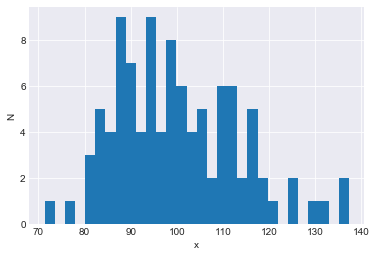

In [42]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
md = {}
# md is an empty dictionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. 

## let numpy calculate what the mean and stdev of this distribution are

In [43]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we will discuss in class)

In [44]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0,0.5,'size of the array')

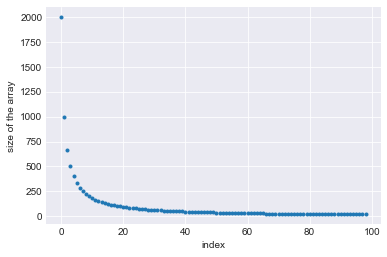

In [45]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.4,100,'expected mean')

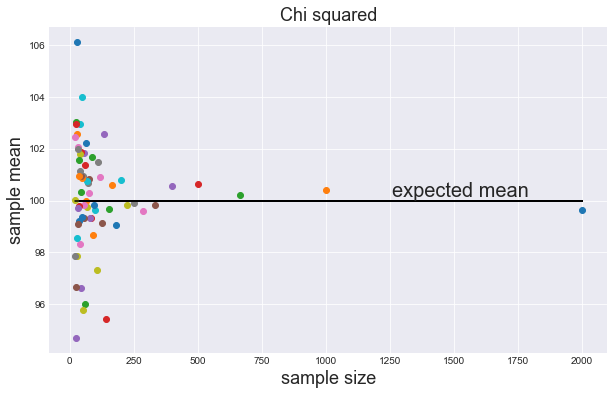

In [46]:
# I am gonna overwrite the dictionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

# and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

### Figure 2: This chart shows that sets with larger samle sizes tend to have sample means that are closer to the expected mean. Sets with smaller sample sizes may have a larger range of sample means, as their samples may not be as representative of the population. This is what the Law of Large Numbers predicts.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

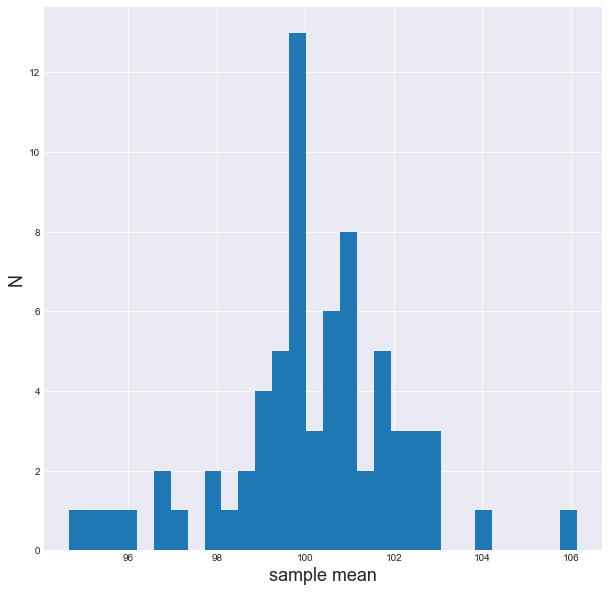

In [47]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: This chart shows that the distribution of the sample means follow a gaussian distribution. There are more sets with sample means closer to the population mean, and less sets with means further to the population mean.

# Do it for the Normal distribution


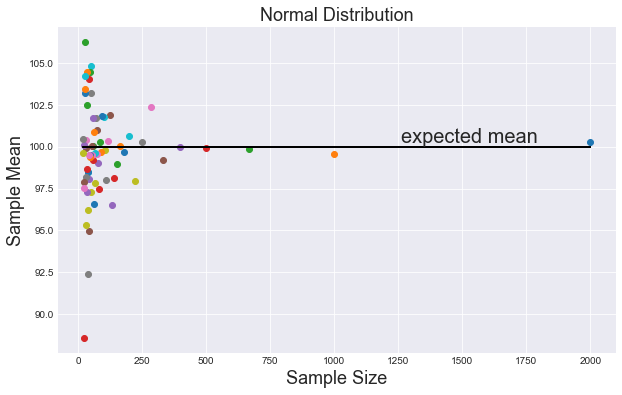

Figure 4: This chart plots the sample mean vs the sample size of a set.The figure shows that sets with larger sample sizes tend to have sample means that are closer to the expected mean. Sets with smaller sample sizes may have a larger range of sample means, as their samples may not be as representative of the population.




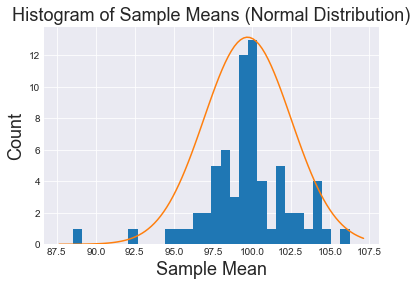

Figure 5: This chart shows that the distribution of the sample means follow a gaussian distribution. There are more sets with sample means closer to the population mean, and less sets with means further to the population mean.


In [48]:
from scipy.stats import norm
import numpy as np

np.random.seed(456)
size = 100;
stdev = 20;

md['norm'] = {}                                             # Create a nested dictionary for a normal distribution
for n in mysize:                                            
    md['norm'][n] = np.random.normal(mymean, stdev, n)      # Create 100 sets of varying size n
md['norm']['means'] = {}                                    # Create a nested dictionary that holds the means of each distribution
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)    # Create the subplot
for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()                # Add each man to the nested dictionary of means
        axnorm_mu_n.plot(nn, md['norm']['means'][nn], 'o')            # Plot the mean vs the size of the distibution
        axnorm_mu_n.set_xlabel('Sample Size', fontsize=18)             # Add the x axis title
        axnorm_mu_n.set_ylabel('Sample Mean', fontsize=18)             # Add the y axis title
        axnorm_mu_n.set_title('Normal Distribution', fontsize=18)      # Add the plot title
        axnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')    # Plot the horizontal line to represent the expected mean
axnorm_mu_n.text(axnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20);                           # Add the text "expected mean" above the horizontal black line

pl.show()
print("Figure 4: This chart plots the sample mean vs the sample size of a set."
      "The figure shows that sets with larger sample",
      "sizes tend to have sample means that are closer to the",
      "expected mean. Sets with smaller sample sizes may have a",
      "larger range of sample means, as their samples may not be",
      "as representative of the population.\n\n")
pl.figure();                                                           # Create a figure so future plots are on a separate chart

means = list(md['norm']['means'].values())                                 # Create a list of all the means
pl.hist(means, bins = 30);                                                  # Plot a histogram of all the means
pl.xlabel('Sample Mean', fontSize = 18)                                     # Add the x axis title
pl.ylabel('Count', fontSize = 18)                                           # Add the y axis title
pl.title('Histogram of Sample Means (Normal Distribution)', fontSize = 18)  # Add the plot title

# EXTRA CREDIT
mean, std = norm.fit(means)                      # Fit a normal distribution to the means
xmin, xmax = pl.xlim()                           # Create the range of the distribution
x = np.linspace(xmin, xmax, 100)                 # Create the range of the distribution
y = norm.pdf(x, mean, std)*92                    # Create the data points of the fitted distribution
pl.plot(x, y);                                   # Plot the fitted distribution
pl.show();
print("Figure 5: This chart shows that the distribution of",
      "the sample means follow a gaussian distribution. There",
      "are more sets with sample means closer to the population",
      "mean, and less sets with means further to the population mean.")

# Do it for the Poisson distribution

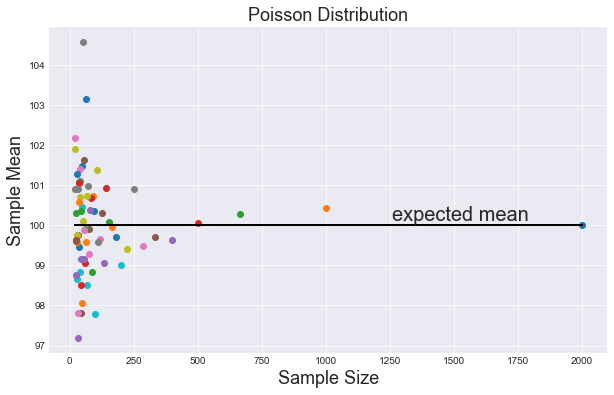

Figure 6: This chart plots the sample mean vs the sample size of a set.The figure shows that sets with larger sample sizes tend to have sample means that are closer to the expected mean. Sets with smaller sample sizes may have a larger range of sample means, as their samples may not be as representative of the population.




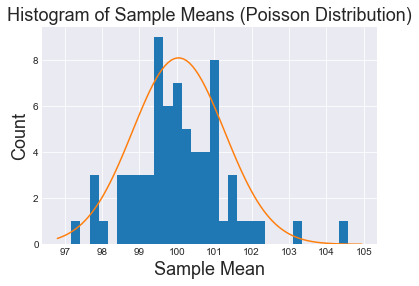

Figure 7: This chart shows that the distribution of the sample means follow a gaussian distribution. There are more sets with sample means closer to the population mean, and less sets with means further to the population mean.


In [49]:
np.random.seed(456)
size = 100;

md['pios'] = {}                                             # Create a nested dictionary for a poisson distribution
for n in mysize:                                            
    md['pios'][n] = np.random.poisson(mymean, n)            # Create 100 sets of varying size n
md['pios']['means'] = {}                                    # Create a nested dictionary that holds the means of each distribution
axlpios_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)   # Create the subplot
for nn in md['pios']:
    if not type(nn) == str:
        md['pios']['means'][nn] = md['pios'][nn].mean()               # Add each man to the nested dictionary of means
        axlpios_mu_n.plot(nn, md['pios']['means'][nn], 'o')           # Plot the mean vs the size of the distibution
        axlpios_mu_n.set_xlabel('Sample Size', fontsize=18)           # Add the x axis title
        axlpios_mu_n.set_ylabel('Sample Mean', fontsize=18)           # Add the y axis title
        axlpios_mu_n.set_title('Poisson Distribution', fontsize=18)   # Add the plot title
        axlpios_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')  # Plot the horizontal line to represent the expected mean
axlpios_mu_n.text(axlpios_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20);                          # Add the text "expected mean" above the horizontal black line
pl.show()
print("Figure 6: This chart plots the sample mean vs the sample size of a set."
      "The figure shows that sets with larger sample",
      "sizes tend to have sample means that are closer to the",
      "expected mean. Sets with smaller sample sizes may have a",
      "larger range of sample means, as their samples may not be",
      "as representative of the population.\n\n")
pl.figure();                                                          # Create a figure so future plots are on a separate chart

means = list(md['pios']['means'].values())                                  # Create a list of all the means
pl.hist(means, bins = 30);                                                  # Plot a histogram of all the means
pl.xlabel('Sample Mean', fontSize = 18)                                     # Add the x axis title
pl.ylabel('Count', fontSize = 18)                                           # Add the y axis title
pl.title('Histogram of Sample Means (Poisson Distribution)', fontSize = 18) # Add the plot title

# EXTRA CREDIT
mean, std = norm.fit(means)                      # Fit a normal distribution to the means
xmin, xmax = pl.xlim()                           # Create the range of the distribution
x = np.linspace(xmin, xmax, 100)                 # Create the range of the distribution
y = norm.pdf(x, mean, std)*25                    # Create the data points of the fitted distribution
pl.plot(x, y);                                   # Plot the fitted distribution
pl.show();
print("Figure 7: This chart shows that the distribution of",
      "the sample means follow a gaussian distribution. There",
      "are more sets with sample means closer to the population",
      "mean, and less sets with means further to the population mean.")

# Do it for the Binomial distribution

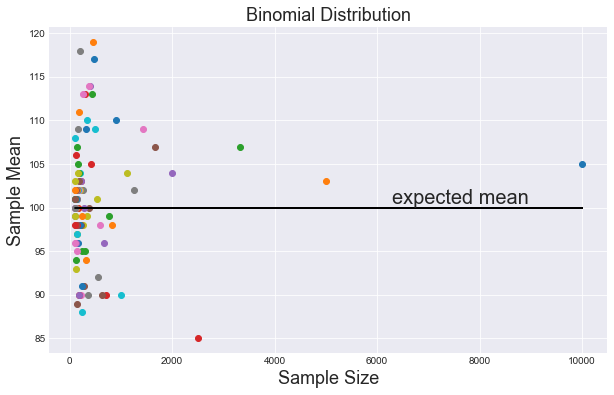

Figure 8: This chart plots the sample mean vs the sample size of a set.The figure shows that sets with larger sample sizes tend to have sample means that are closer to the expected mean. Sets with smaller sample sizes may have a larger range of sample means, as their samples may not be as representative of the population.




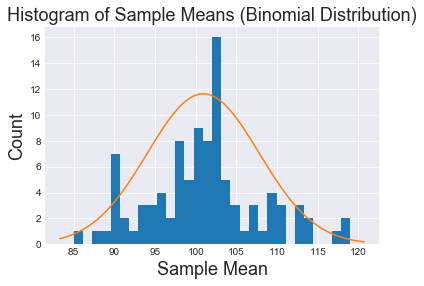

Figure 9: This chart shows that the distribution of the sample means follow a gaussian distribution. There are more sets with sample means closer to the population mean, and less sets with means further to the population mean.


In [50]:
np.random.seed(456)
mymean = 100;
mysize = (10001 / (np.array(range(1, 100)))).astype(int);

md['binomial'] = {}                                             # Create a nested dictionary for a binomial distribution
for n in mysize:                                            
    md['binomial'][n] = np.random.binomial(n, mymean / n)       # Create 100 sets of varying size n
md['binomial']['means'] = {}                                    # Create a nested dictionary that holds the means of each distribution
axlbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)   # Create the subplot

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn]                   # Add each man to the nested dictionary of means
        axlbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')        # Plot the mean vs the size of the distibution
        axlbinomial_mu_n.set_xlabel('Sample Size', fontsize=18)            # Add the x axis title
        axlbinomial_mu_n.set_ylabel('Sample Mean', fontsize=18)            # Add the y axis title
        axlbinomial_mu_n.set_title('Binomial Distribution', fontsize=18)   # Add the plot title
        axlbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')   # Plot the horizontal line to represent the expected mean
axlbinomial_mu_n.text(axlbinomial_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20);                               # Add the text "expected mean" above the horizontal black line
pl.show()
print("Figure 8: This chart plots the sample mean vs the sample size of a set."
      "The figure shows that sets with larger sample",
      "sizes tend to have sample means that are closer to the",
      "expected mean. Sets with smaller sample sizes may have a",
      "larger range of sample means, as their samples may not be",
      "as representative of the population.\n\n")
pl.figure();                                                               # Create a figure so future plots are on a separate chart

means = list(md['binomial']['means'].values())                                # Create a list of all the means
pl.hist(means, bins = 30);                                                    # Plot a histogram of all the means
pl.xlabel('Sample Mean', fontSize = 18)                                       # Add the x axis title
pl.ylabel('Count', fontSize = 18)                                             # Add the y axis title
pl.title('Histogram of Sample Means (Binomial Distribution)', fontSize = 18)  # Add the plot title

# EXTRA CREDIT
mean, std = norm.fit(means)             # Fit a normal distribution to the means
xmin, xmax = pl.xlim()                  # Create the range of the distribution
x = np.linspace(xmin, xmax, 100)        # Create the range of the distribution
y = norm.pdf(x, mean, std)*200          # Create the data points of the fitted distribution
pl.plot(x, y);                          # Plot the fitted distribution
pl.show();
print("Figure 9: This chart shows that the distribution of",
      "the sample means follow a gaussian distribution. There",
      "are more sets with sample means closer to the population",
      "mean, and less sets with means further to the population mean.")

# Do it for another distribution

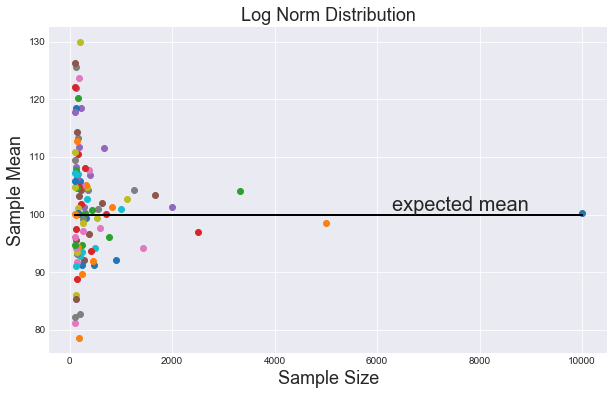

Figure 10: This chart plots the sample mean vs the sample size of a set.The figure shows that sets with larger sample sizes tend to have sample means that are closer to the expected mean. Sets with smaller sample sizes may have a larger range of sample means, as their samples may not be as representative of the population.




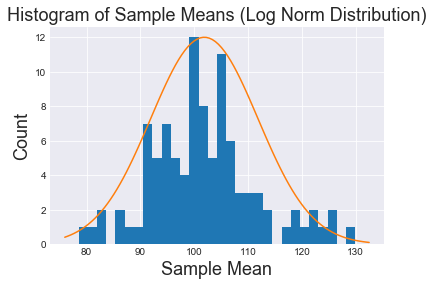

Figure 11: This chart shows that the distribution of the sample means follow a gaussian distribution. There are more sets with sample means closer to the population mean, and less sets with means further to the population mean.


In [51]:
np.random.seed(456)
mymean = 100;
stdev = 1;

md['lnorm'] = {}                                                                 # Create a nested dictionary for a log-normal distribution
for n in mysize:                                            
    md['lnorm'][n] = np.random.lognormal(np.log(mymean) - stdev**2/2, stdev, n)  # Create 100 sets of varying size n
md['lnorm']['means'] = {}                                                        # Create a nested dictionary that holds the means of each distribution
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)                        # Create tahe subplot
for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()             # Add each man to the nested dictionary of means
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')          # Plot the mean vs the size of the distibution
        axlnorm_mu_n.set_xlabel('Sample Size', fontsize=18)           # Add the x axis title
        axlnorm_mu_n.set_ylabel('Sample Mean', fontsize=18)           # Add the y axis title
        axlnorm_mu_n.set_title('Log Norm Distribution', fontsize=18)  # Add the plot title
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')  # Plot the horizontal line to represent the expected mean
axlnorm_mu_n.text(axlnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20);                          # Add the text "expected mean" above the horizontal black line
pl.show()
print("Figure 10: This chart plots the sample mean vs the sample size of a set."
      "The figure shows that sets with larger sample",
      "sizes tend to have sample means that are closer to the",
      "expected mean. Sets with smaller sample sizes may have a",
      "larger range of sample means, as their samples may not be",
      "as representative of the population.\n\n")
pl.figure();                                                          # Create a figure so future plots are on a separate chart

means = list(md['lnorm']['means'].values())                                  # Create a list of all the means
pl.hist(means, bins = 30);                                                   # Plot a histogram of all the means
pl.xlabel('Sample Mean', fontSize = 18)                                      # Add the x axis title
pl.ylabel('Count', fontSize = 18)                                            # Add the y axis title
pl.title('Histogram of Sample Means (Log Norm Distribution)', fontSize = 18) # Add the plot title

# EXTRA CREDIT
mean, std = norm.fit(means)             # Fit a normal distribution to the means
xmin, xmax = pl.xlim()                  # Create the range of the distribution
x = np.linspace(xmin, xmax, 100)        # Create the range of the distribution
y = norm.pdf(x, mean, std)*300          # Create the data points of the fitted distribution
pl.plot(x, y);                          # Plot the fitted distribution
pl.show();
print("Figure 11: This chart shows that the distribution of",
      "the sample means follow a gaussian distribution. There",
      "are more sets with sample means closer to the population",
      "mean, and less sets with means further to the population mean.")

# 667 students: fita  a Gaussian to the histogram of the means for each distribution

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram. 

(array([ 1.,  1.,  1.,  1.,  0.,  2.,  1.,  0.,  2.,  1.,  2.,  4.,  5.,
        13.,  3.,  6.,  8.,  2.,  5.,  3.,  3.,  3.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 94.67091516,  95.05270456,  95.43449395,  95.81628335,
         96.19807274,  96.57986214,  96.96165154,  97.34344093,
         97.72523033,  98.10701972,  98.48880912,  98.87059852,
         99.25238791,  99.63417731, 100.0159667 , 100.3977561 ,
        100.7795455 , 101.16133489, 101.54312429, 101.92491369,
        102.30670308, 102.68849248, 103.07028187, 103.45207127,
        103.83386067, 104.21565006, 104.59743946, 104.97922885,
        105.36101825, 105.74280765, 106.12459704]),
 <a list of 30 Patch objects>)

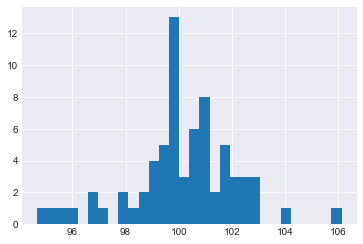

In [52]:
pl.hist(allmeans,bins=30)

And you can create your own Gaussian function to pass to curve_fit as this for example: 

In [53]:
def gaussian(x, mu, sigma....):
    ''' 
    REMEMBER TO WRITE A DOCSTRING THAT EXPLAINS WHAT A FUNCTION DOES EVERY TIME YOU WRITE A FUNCTION 
    https://www.python.org/dev/peps/pep-0257/
    '''

SyntaxError: invalid syntax (<ipython-input-53-951dbb0071e0>, line 1)

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)